__Customer Churn using Telco Dataset__

### **Importing the packages**

In [21]:
##Importing the packages
#Data processing packages
import numpy as np 
import pandas as pd 

#Visualization packages
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

### **Importing the data**

In [22]:
#Add the dataset Telco Customer Churn - Focused customer retention programs#
data = pd.read_csv('../input/WA_Fn-UseC_-Telco-Customer-Churn.csv')


### **Basic Analysis**

In [23]:
#Find the size of the data Rows x Columns
data.shape

(7043, 21)

**COMMENTS:** 

In [24]:
#Display first 5 rows of Customer Data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**COMMENTS:** 
1. 
2. 
3. 
4. 

In [26]:
#Find the the information about the fields, field datatypes and Null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

**COMMENTS:**  

### **Visualizing the impact of Categorical Features on the Target**

In [27]:
#These fields does not add value, hence removed
data = data.drop(['customerID'], axis = 1)

In [28]:
#Confirm that customerID column is dropped
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
#Find Churn size (Values)
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

![](http://) **COMMENTS:**  

### **Convert Categorical values to Numeric Values**

In [30]:
#A lambda function is a small anonymous function.
#A lambda function can take any number of arguments, but can only have one expression.
data['Churn']=data['Churn'].apply(lambda x : 1 if x=='Yes' else 0)

In [31]:
#Finding the Count of Customer Churn. The output shows that 1869 customers churned(left) last month
data.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [32]:
#Compare gender with Churn using crosstab.
pd.crosstab(data.Churn, data.gender)


gender,Female,Male
Churn,,
0,2549,2625
1,939,930


### **Compare the fields**

In [33]:
#Compare gender with Churn using crosstab. Add Total(margins)
pd.crosstab(data.Churn, data.gender, margins=True)


gender,Female,Male,All
Churn,,,
0,2549,2625,5174
1,939,930,1869
All,3488,3555,7043


In [34]:
#Compare gender with Churn using crosstab. Add Total(margins). Make it colorful.
pd.crosstab(data.Churn, data.gender, margins=True).style.background_gradient(cmap='autumn_r')


gender,Female,Male,All
Churn,,,
0,2549,2625,5174
1,939,930,1869
All,3488,3555,7043


In [35]:
#Compare gender with Churn using crosstab. Add Total(margins). Make it colorful. Normalize the data
pd.crosstab(data.Churn, data.gender, margins=True, normalize='index').style.background_gradient(cmap='autumn_r')


gender,Female,Male
Churn,,
0,0.492656,0.507344
1,0.502408,0.497592
All,0.495244,0.504756


In [38]:
#Compare gender with Churn using crosstab. Add Total(margins). Make it colorful. Normalize the data. Round it to two digits after decimal
pd.crosstab(data.Churn, data.gender, margins=True, normalize='index').round(2).style.background_gradient(cmap='autumn_r')


gender,Female,Male
Churn,,
0,0.49,0.51
1,0.5,0.5
All,0.5,0.5


![](http://) **OBSERVATION:**  
![](http://) **RECOMMENDED ACTION:**  

In [37]:
#Compare Partner with Churn using crosstab
pd.crosstab(data.Partner, data.Churn, margins=True, normalize='index').round(2).style.background_gradient(cmap='autumn_r')


Churn,0,1
Partner,,
No,0.67,0.33
Yes,0.8,0.2
All,0.73,0.27


![](http://) **OBSERVATION:**   The Telco that had Partners have less customers leaving
![](http://) **RECOMMENDED ACTION:**  Target the customers who have Partners as they have higher retention rate

In [39]:
#Compare Dependents with Churn using crosstab
pd.crosstab(data.Dependents, data.Churn, margins=True, normalize='index').round(2).style.background_gradient(cmap='autumn_r')


Churn,0,1
Dependents,,
No,0.69,0.31
Yes,0.85,0.15
All,0.73,0.27


![](http://) **OBSERVATION:**  The Telco that had Dependents have less customers leaving
![](http://) **RECOMMENDED ACTION:**  Target the customers who have dependents. Family plans may help

In [40]:
#Compare PhoneService with Churn using crosstab
pd.crosstab(data.PhoneService, data.Churn, margins=True, normalize='index').round(2).style.background_gradient(cmap='autumn_r')


Churn,0,1
PhoneService,,
No,0.75,0.25
Yes,0.73,0.27
All,0.73,0.27


![](http://) **OBSERVATION:**  PhoneService has less impact on customers leaving
![](http://) **RECOMMENDED ACTION:**  No action is required

In [41]:
#Compare MultipleLines with Churn using crosstab
pd.crosstab(data.MultipleLines, data.Churn, margins=True, normalize='index').round(2).style.background_gradient(cmap='autumn_r')


Churn,0,1
MultipleLines,,
No,0.75,0.25
No phone service,0.75,0.25
Yes,0.71,0.29
All,0.73,0.27


![](http://) **OBSERVATION:**  No. of lines have less impact on customers leaving
![](http://) **RECOMMENDED ACTION:**  No action required

In [42]:
#Compare InternetService with Churn using crosstab
pd.crosstab(data.InternetService, data.Churn, margins=True, normalize='index').round(2).style.background_gradient(cmap='autumn_r')


Churn,0,1
InternetService,,
DSL,0.81,0.19
Fiber optic,0.58,0.42
No,0.93,0.07
All,0.73,0.27


![](http://) **OBSERVATION:**   Customers with FiberOptic internet connection have higher probability of leaving
![](http://) **RECOMMENDED ACTION:**  Recommended DSL connection to the customers and also investigate if there are problems in Fiber Optic connection

In [43]:
#Compare OnlineSecurity with Churn using crosstab
pd.crosstab(data.OnlineSecurity, data.Churn, margins=True, normalize='index').round(2).style.background_gradient(cmap='autumn_r')


Churn,0,1
OnlineSecurity,,
No,0.58,0.42
No internet service,0.93,0.07
Yes,0.85,0.15
All,0.73,0.27


![](http://) **OBSERVATION:**  Customers who are not provided Online Security have higher chance of leaving
![](http://) **RECOMMENDED ACTION:**  Provide OnlineSecurity to the customers as the default offering or value added service with minimum fee

In [44]:
#Compare OnlineBackup with Churn using crosstab
pd.crosstab(data.OnlineBackup, data.Churn, margins=True, normalize='index').round(2).style.background_gradient(cmap='autumn_r')


Churn,0,1
OnlineBackup,,
No,0.6,0.4
No internet service,0.93,0.07
Yes,0.78,0.22
All,0.73,0.27


![](http://) **OBSERVATION:**  
![](http://) **RECOMMENDED ACTION:**  

In [45]:
#Compare DeviceProtection with Churn using crosstab
pd.crosstab(data.DeviceProtection, data.Churn, margins=True, normalize='index').round(2).style.background_gradient(cmap='autumn_r')


Churn,0,1
DeviceProtection,,
No,0.61,0.39
No internet service,0.93,0.07
Yes,0.77,0.23
All,0.73,0.27


![](http://) **OBSERVATION:**  
![](http://) **RECOMMENDED ACTION:**  

In [46]:
#Compare TechSupport with Churn using crosstab
pd.crosstab(data.TechSupport, data.Churn, margins=True, normalize='index').round(2).style.background_gradient(cmap='autumn_r')


Churn,0,1
TechSupport,,
No,0.58,0.42
No internet service,0.93,0.07
Yes,0.85,0.15
All,0.73,0.27


![](http://) **OBSERVATION:**  
![](http://) **RECOMMENDED ACTION:**  

In [47]:
#Compare StreamingTV with Churn using crosstab
pd.crosstab(data.StreamingTV, data.Churn, margins=True, normalize='index').round(2).style.background_gradient(cmap='autumn_r')


Churn,0,1
StreamingTV,,
No,0.66,0.34
No internet service,0.93,0.07
Yes,0.7,0.3
All,0.73,0.27


![](http://) **OBSERVATION:**  
![](http://) **RECOMMENDED ACTION:** 

In [48]:
#Compare StreamingMovies with Churn using crosstab
pd.crosstab(data.StreamingMovies, data.Churn, margins=True, normalize='index').round(2).style.background_gradient(cmap='autumn_r')


Churn,0,1
StreamingMovies,,
No,0.66,0.34
No internet service,0.93,0.07
Yes,0.7,0.3
All,0.73,0.27


![](http://) **OBSERVATION:**  
![](http://) **RECOMMENDED ACTION:**  

In [49]:
#Compare Contract with Churn using crosstab
pd.crosstab(data.Contract, data.Churn, margins=True, normalize='index').round(2).style.background_gradient(cmap='autumn_r')


Churn,0,1
Contract,,
Month-to-month,0.57,0.43
One year,0.89,0.11
Two year,0.97,0.03
All,0.73,0.27


![](http://) **OBSERVATION:**  
![](http://) **RECOMMENDED ACTION:**  

In [50]:
#Compare PaperlessBilling with Churn using crosstab
pd.crosstab(data.PaperlessBilling, data.Churn, margins=True, normalize='index').round(2).style.background_gradient(cmap='autumn_r')


Churn,0,1
PaperlessBilling,,
No,0.84,0.16
Yes,0.66,0.34
All,0.73,0.27


![](http://) **OBSERVATION:**  
![](http://) **RECOMMENDED ACTION:**  

In [51]:
#Compare PaymentMethod with Churn using crosstab
pd.crosstab(data.PaymentMethod, data.Churn, margins=True, normalize='index').round(2).style.background_gradient(cmap='autumn_r')


Churn,0,1
PaymentMethod,,
Bank transfer (automatic),0.83,0.17
Credit card (automatic),0.85,0.15
Electronic check,0.55,0.45
Mailed check,0.81,0.19
All,0.73,0.27


![](http://) **OBSERVATION:**  
![](http://) **RECOMMENDED ACTION:**  

### **Visualizing the impact of Numerical Features on the Target**

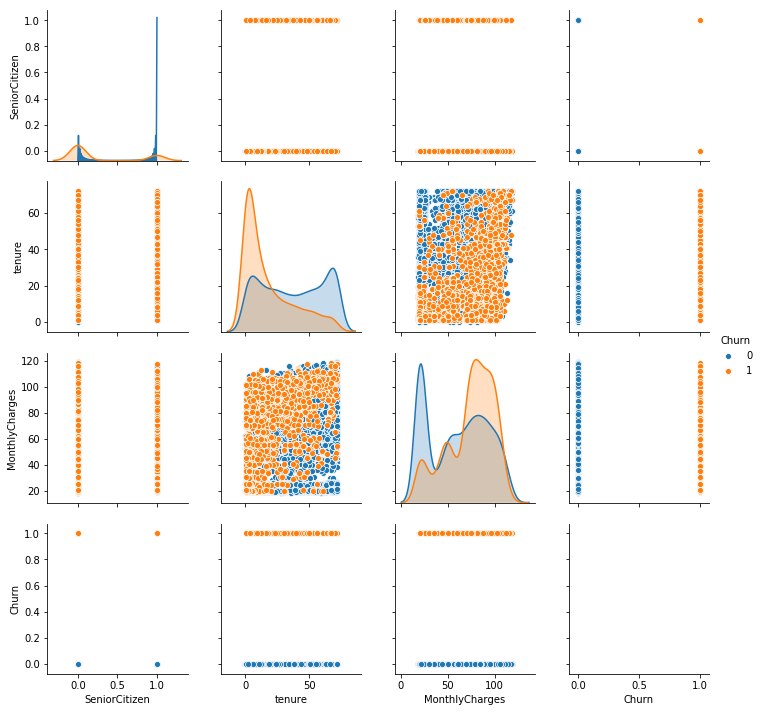

In [53]:
#Plot the pairplot of all the Numerical parameters(data) against Churn
sns.pairplot(data=data,hue='Churn')


![](http://) **OBSERVATIONS:** 
1. 
2. 
3.  
 ![](http://) **RECOMMENDED ACTIONS:**  
1. 
2. 
3. 

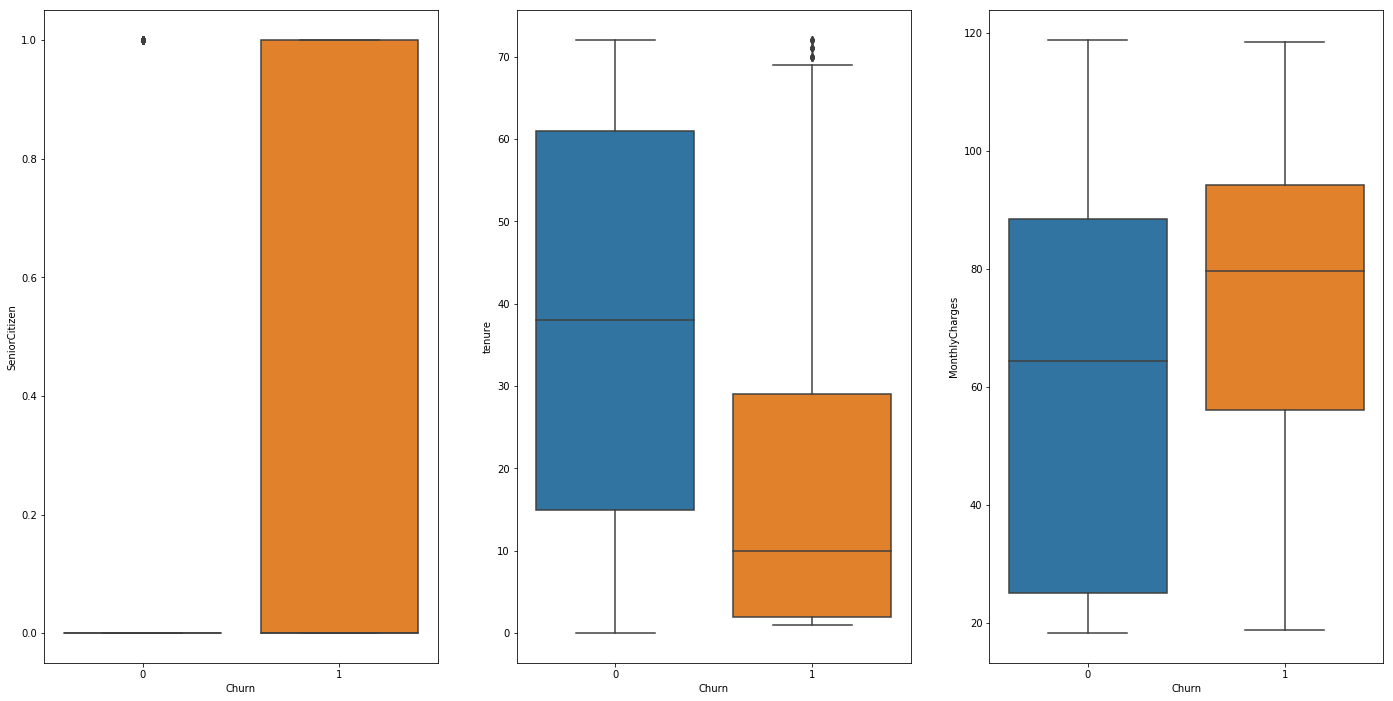

In [55]:
#Comparing the numeric fields SeniorCitizen, tenure and MonthlyCharges against Customer Churn using boxplots
plt.figure(figsize=(24,12))
plt.subplot(131)  ; sns.boxplot(x='Churn',y='SeniorCitizen',data=data)
plt.subplot(132)  ; sns.boxplot(x='Churn',y='tenure',data=data)
plt.subplot(133)  ; sns.boxplot(x='Churn',y='MonthlyCharges',data=data)
